Exercise 2: Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PolynomialRegression import PolynomialRegression
from Utils import get_sorted, data_split

In [2]:
data = np.genfromtxt('../A2_datasets/secret_polynomial.csv', delimiter=',')

Run 1:
  Degree 1: MSE = 12528.72
  Degree 2: MSE = 12682.85
  Degree 3: MSE = 5440.90
  Degree 4: MSE = 4923.19
  Degree 5: MSE = 5006.83
  Degree 6: MSE = 5122.80
Run 2:
  Degree 1: MSE = 8730.82
  Degree 2: MSE = 9064.43
  Degree 3: MSE = 5700.33
  Degree 4: MSE = 4945.10
  Degree 5: MSE = 5205.30
  Degree 6: MSE = 5444.07
Run 3:
  Degree 1: MSE = 10151.70
  Degree 2: MSE = 10257.36
  Degree 3: MSE = 5770.77
  Degree 4: MSE = 5510.38
  Degree 5: MSE = 5589.59
  Degree 6: MSE = 5598.80


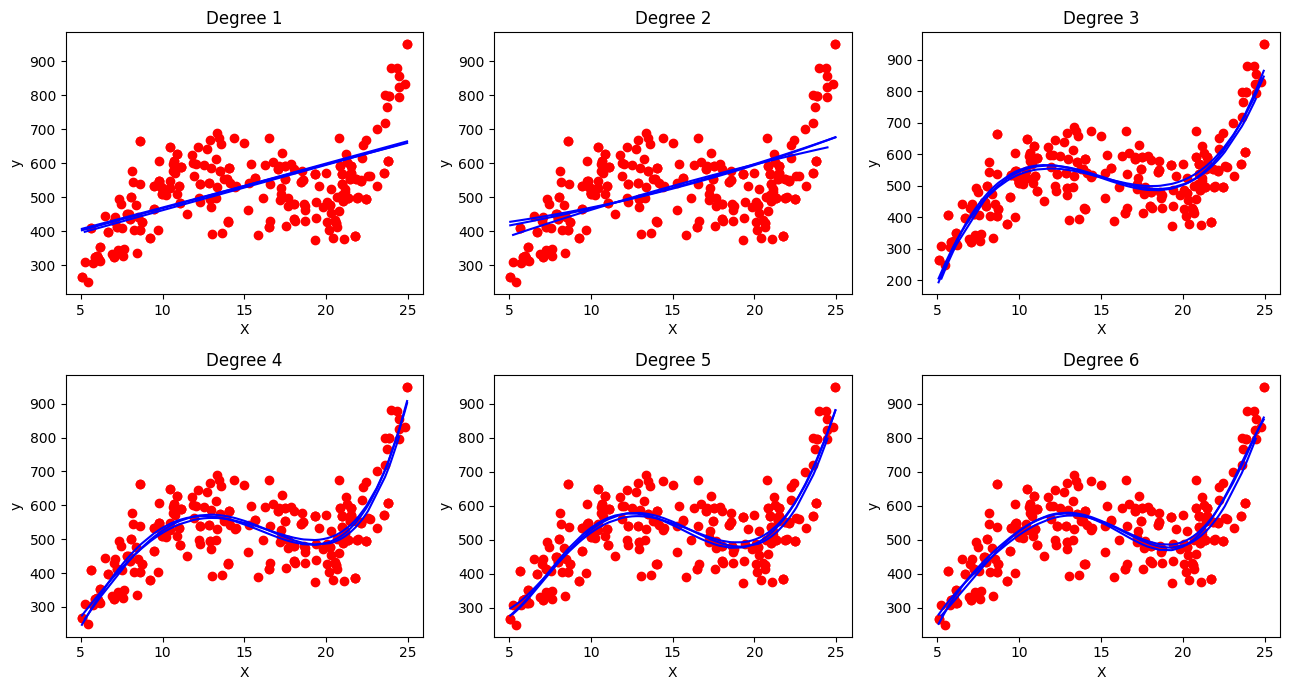

In [3]:
degrees = [1, 2, 3, 4, 5, 6]
fig, ax = plt.subplots(2, 3, figsize=(13, 7))
ax = ax.ravel()

# number of runs to perform with shuffled data
num_runs = 3

for n in range(num_runs):
    print('Run {}:'.format(n+1))
    X_train, y_train, X_test, y_test = data_split(data, random_state=42)

    for i, d in enumerate(degrees):
        poly_reg = PolynomialRegression(degree=d)
        poly_reg.fit(X_train, y_train)
        y_pred = poly_reg.predict(X_test)

        mse = poly_reg.calculus.mean_square_error(y_test, y_pred)
        print('  Degree {}: MSE = {:.2f}'.format(i+1, mse))

        X_test_sorted, y_pred_sorted = get_sorted(X_test, y_pred)
        ax[i].scatter(X_test, y_test, color='red')
        ax[i].plot(X_test_sorted, y_pred_sorted, color='blue', label='Degree {}, MSE: {:.2f}'.format(d, mse))

        ax[i].set_title('Degree {}'.format(d))
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('y')

plt.tight_layout()
plt.show()

Running the code above several times, I got that degrees 4, 5, and 6 were almost even.<br>
Degree 4 is the best fit since its MSE is the smallest, and we know that the smaller the better.<br>
Obs: when you run the code, you might get a different result than mine, so then, the best fit will be the one that has the smallest MSE.